### UTFPR - UNIVERSIDADE TECNOLÓGICA FEDERAL DO PARANÁ
### DAELT - DEPARTAMENTO ACADÊMICO DE ELETROTÉCNICA

**Disciplina**: ET7GF - Sinais e Sistemas 2

**Professor**: Glauber Brante

**Aluno**: Douglas Dangui Pedroso

---

## Atividade de Simulação 05: Amostragem de Sinais Contínuos no Tempo

---

**Projeto 1: Amostragem de uma senóide.**

Considere o seguinte sinal contínuo no tempo com frequência $f0$ em Hz:

\begin{equation}
\large
        x(t) = cos(2{\pi}f_0t).
\end{equation}

Se amostrarmos esse sinal com frequência $fs = \frac{1}{T_s}$ , iremos obter o seguinte sinal discreto no tempo:

\begin{equation}
\large    
        x[n] = x[nT_s] \\
\large
        = cos(2{\pi}f_0T_sn) \\
\large
        = cos(2{\pi}\frac{f_0}{f_s}n). \\
\end{equation}

Para os exercícios abaixo, utilize a frequência de amostragem $fs = 4096 Hz$.

**1.** Considerando $f0 = 128, 256, 384$ e $512 Hz$, amostre $x(t)$ e plote o sinal resultante utilizando um intervalo de aproximadamente $16 ms$. Use o comando subplot para colocar tudo em uma mesma figura.

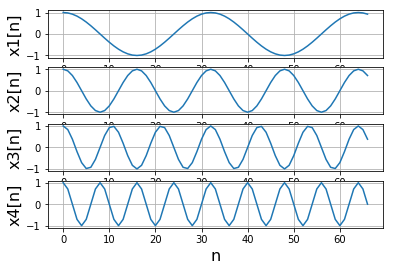

In [3]:
from numpy import *
from matplotlib.pyplot import *
from pyaudio import *

fs = 4096
f = [128,256,384,512]
clf()

for i in range(0,4):
    
    # Áudio de 1 segundo
    tmax = round(1*fs)
    n = arange(0, tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    x = float32(x/amax(x))
    p = PyAudio()
    stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
    # play
    stream.write(x, num_frames=size(x))
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    tmax = round(fs*0.016)
    n = arange(0,tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
  
    subplot(4,1,i+1)
    plot(n,x)
    grid(True)
    ylabel('x%i[n]'%(i+1),fontsize=16)
    xlabel('n',fontsize=16)

A frequência do sinal discreto no tempo parece estar aumentando? Explique.

**Resposta:**

Sim, a frequência está aumentando como pode-se notar pelo gráfico e pelos tons da música que estão ficando cada vez mais agudos.

**2.** Considerando $f0 = 3584, 3712, 3840$ e $3968 Hz$, amostre $x(t)$ e plote o sinal resultante em um intervalo de aproximadamente $16 ms$. Use o comando subplot para colocar tudo em uma mesma figura.

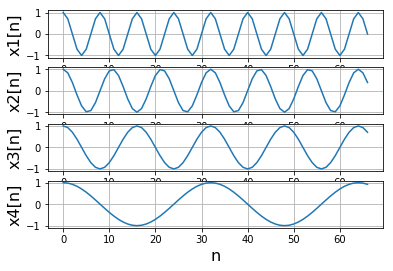

In [4]:
f = [3584,3712,3840,3968]
fs = 4096
clf()

for i in range(0,4):
    
    # Áudio de 1 segundo
    tmax = round(1*fs)
    n = arange(0, tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    x = float32(x/amax(x))
    p = PyAudio()
    stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
    # play
    stream.write(x, num_frames=size(x))
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    tmax = round(fs*0.016)
    n = arange(0,tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    
    subplot(4,1,i+1)
    plot(n,x)
    grid(True)
    ylabel('x%i[n]'%(i+1),fontsize=16)
    xlabel('n',fontsize=16)  

A frequência do sinal discreto no tempo parece estar aumentando? Explique.

**Resposta:**

Nota-se, na verdade, que as frequências amostradas neste item estão diminuindo em sequência, sendo a ordem inversa da amostrada no item $1)$, mesmo com o aumento da frequência $f_0$ a cada iteração, como pode-se concluir através da visualização dos gráficos e dos tons de música escutados.

Tal fato dá-se o nome de aliasing, acontecendo quando a frequência amostrada é maior que a metade da frequência de amostragem, que neste caso o limite é 2048 e 4096, respectivamente.


**3.** Agora, considere as frequências $528, 594, 660$ e $704 Hz$. Amostre $x(t)$ com cada frequência sobre um intervalo de aproximadamente $0,25 s$. Crie um novo sinal concatenando os quatro sinais amostrados, ou seja, o novo sinal deverá conter quatro segmentos de 0,25 s, cada segmente com uma frequência. Em seguida, adapte o código de exemplo disponível no Moodle
para escutar este sinal.

**Obs.: Fones de ouvido são bastante úteis para essa prática.**

(array([[4.45402627e-13, 4.48388464e-13, 2.65515129e-13, ...,
         9.01005654e-14, 1.02370554e-13, 1.25990694e-13],
        [8.81586994e-13, 8.77515925e-13, 1.18187634e-12, ...,
         2.03888867e-13, 2.05110618e-13, 1.36530535e-13],
        [8.68903116e-13, 8.90831939e-13, 8.02430395e-13, ...,
         2.30078761e-13, 2.07547563e-13, 2.07476252e-13],
        ...,
        [4.43948604e-15, 7.66040455e-15, 2.22114969e-15, ...,
         2.20547715e-15, 5.95080360e-15, 6.46648570e-14],
        [1.47384557e-15, 3.00276631e-15, 3.90564931e-15, ...,
         5.54299375e-15, 5.96547406e-15, 2.72227224e-14],
        [1.60067872e-15, 1.76556082e-16, 4.25894872e-16, ...,
         4.63721066e-15, 2.95683689e-15, 4.18941228e-16]]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,  128.,
         144.,  160.,  176.,  192.,  208.,  224.,  240.,  256.,  272.,
         288.,  304.,  320.,  336.,  352.,  368.,  384.,  400.,  416.,
         432.,  448.,  464.,  480.,  496.,  512.,  5

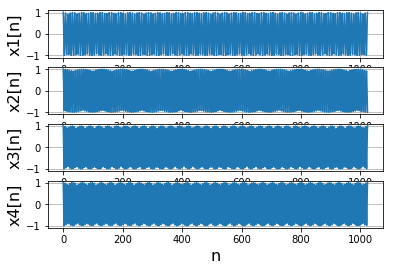

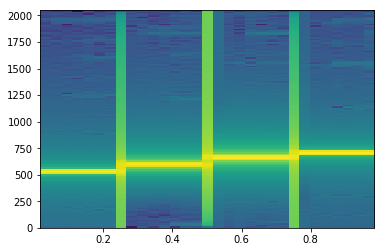

In [5]:
f = [528,594,660,704]
fs = 4096
clf()
x1 = []

for i in range(0,4):
    
    tmax = round(fs*0.25)
    n = arange(0,tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    x1 = concatenate((x1,x))
    subplot(4,1,i+1)
    plot(n,x)
    grid(True)
    ylabel('x%i[n]'%(i+1),fontsize=16)
    xlabel('n',fontsize=16)
   
x1 = float32(x1/amax(x1))    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
# play
stream.write(x1, num_frames=size(x1))
stream.stop_stream()
stream.close()
p.terminate()

figure(2)
specgram(x1,256,fs)

Você consegue ouvir quatro tons diferentes? Esses tons estão aumentando em frequência?

Por fim, utilize o comando specgram para visualizar este sinal no tempo e na frequência.

**Sugestão: Supondo que sua variável seja xt, use o seguinte comando para traçar o espectrograma: specgram(xt, Fs=fs), em que fs é q variável que define a sua frequência de amostragem.**

**Resposta:**

Sim, estão aumentando em frequência como pode-se notar através dos tons ficando cada vez mais agudos e através do espectrograma.

**4.** Repita o procedimento utilizando as seguintes frequências: $3392, 3436, 3502$ e $3568 Hz$. 

(array([[9.94042608e-14, 1.12387850e-13, 5.25709042e-13, ...,
         2.20861777e-13, 5.91363522e-13, 1.44064757e-12],
        [2.57726090e-13, 1.94867121e-13, 1.38103436e-13, ...,
         1.56321656e-12, 8.04005913e-13, 1.94805658e-13],
        [2.20206854e-13, 4.84902940e-13, 1.68573368e-12, ...,
         5.82700206e-13, 1.78313582e-12, 2.27575175e-12],
        ...,
        [3.71053639e-15, 4.63533251e-14, 1.34734188e-14, ...,
         1.93330921e-12, 1.02048561e-12, 1.14077049e-12],
        [4.37999592e-14, 4.77660034e-14, 9.00404528e-14, ...,
         4.59649270e-13, 1.12938445e-12, 2.84522472e-13],
        [7.17869080e-15, 7.07940418e-15, 1.20706620e-13, ...,
         3.09957073e-14, 5.09871046e-13, 5.64877531e-15]]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,  128.,
         144.,  160.,  176.,  192.,  208.,  224.,  240.,  256.,  272.,
         288.,  304.,  320.,  336.,  352.,  368.,  384.,  400.,  416.,
         432.,  448.,  464.,  480.,  496.,  512.,  5

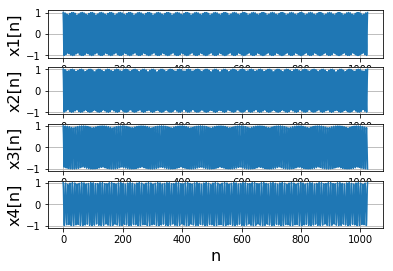

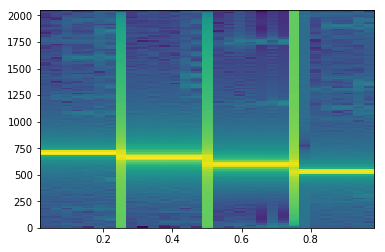

In [6]:
f = [3392,3436,3502,3568]
fs = 4096
clf()
x1 = []

for i in range(0,4):
    
    tmax = round(fs*0.25)
    n = arange(0,tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    x1 = concatenate((x1,x))
    subplot(4,1,i+1)
    plot(n,x)
    grid(True)
    ylabel('x%i[n]'%(i+1),fontsize=16)
    xlabel('n',fontsize=16)
   
x1 = float32(x1/amax(x1))    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
# play
stream.write(x1, num_frames=size(x1))
stream.stop_stream()
stream.close()
p.terminate()

figure(2)
specgram(x1,256,fs)

Você consegue ouvir quatro tons diferentes? Esses tons estão aumentando em frequência? Explique com o auxílio do comando specgram.

**Resposta:**

Sim, é possível ouvir os quatro tons diferentes. Estão diminuindo em frequência, devido ao efeito aliasing, como explicitado anteriormente.
É possível notar que a frequência está diminuindo ao longo do tempo conforme mostra o espectrograma.

**5.** Considere agora a sequência **f0 = 988, 1109, 1175, 1319, 1480, 1175** e **1480 Hz**, amostre **x(t)** sobre um intervalo de  roximadamente *0,25 s* e concatene os sete sinais amostrados. Novamente, escute o sinal concatenado. 

(array([[1.76714155e-16, 3.58180367e-14, 1.12631705e-13, ...,
         2.83116925e-15, 2.90118568e-16, 3.59036619e-16],
        [1.12914156e-15, 9.73228115e-14, 1.28984833e-13, ...,
         3.22352503e-14, 4.42784347e-15, 5.49381734e-15],
        [3.79249639e-15, 4.88372471e-14, 1.05892473e-13, ...,
         2.18946781e-13, 1.56226610e-13, 1.91247703e-13],
        ...,
        [4.54648895e-16, 1.66739128e-15, 5.93081079e-15, ...,
         1.77067434e-12, 3.33032189e-12, 1.08841435e-12],
        [1.24020364e-15, 1.39832785e-14, 2.16008137e-14, ...,
         2.98928523e-13, 1.35025986e-12, 1.42654036e-12],
        [1.84206269e-17, 4.68811289e-16, 4.65050384e-14, ...,
         1.55897331e-12, 1.93077734e-12, 6.82708435e-13]]),
 array([   0.,   16.,   32.,   48.,   64.,   80.,   96.,  112.,  128.,
         144.,  160.,  176.,  192.,  208.,  224.,  240.,  256.,  272.,
         288.,  304.,  320.,  336.,  352.,  368.,  384.,  400.,  416.,
         432.,  448.,  464.,  480.,  496.,  512.,  5

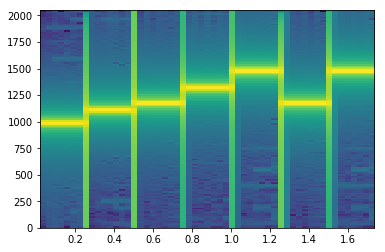

In [8]:
f = [988,1109,1175,1319,1480,1175,1480]
fs = 4096
clf()
x1 = []

for i in range(0,7):
    
    tmax = round(fs*0.25)
    n = arange(0,tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    x1 = concatenate((x1,x))
   
x1 = float32(x1/amax(x1))    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
# play
stream.write(x1, num_frames=size(x1))
stream.stop_stream()
stream.close()
p.terminate()

clf()
specgram(x1,256,fs)

Você consegue ouvir os sete tons da forma como esperado?

**Resposta:**

Sim.

Repita o procedimento usando fs = 2048 Hz. 

(array([[2.33924133e-15, 1.28994837e-14, 1.67719868e-13, ...,
         2.68605071e-11, 1.59319021e-14, 3.59971376e-15],
        [9.70872145e-15, 1.79354674e-14, 1.72974441e-13, ...,
         6.08934739e-11, 7.60770882e-14, 3.25733515e-13],
        [3.83870933e-15, 4.64272166e-14, 2.35821104e-14, ...,
         5.58561494e-11, 4.13256811e-13, 4.38522108e-13],
        ...,
        [2.26754431e-05, 2.75278411e-05, 2.26764781e-05, ...,
         2.09400016e-10, 9.63698766e-14, 3.06562212e-13],
        [1.59322030e-06, 4.28976062e-06, 1.59297204e-06, ...,
         2.08305163e-10, 3.35953596e-13, 1.62029259e-13],
        [3.48475173e-09, 1.14129484e-06, 3.49825568e-09, ...,
         1.03304216e-10, 2.28960745e-14, 1.69097487e-13]]),
 array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
          72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
         144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
         216.,  224.,  232.,  240.,  248.,  256.,  2

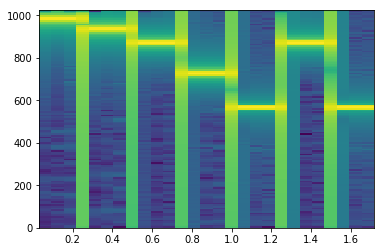

In [9]:
f = [988,1109,1175,1319,1480,1175,1480]
fs = 2048
clf()
x1 = []

for i in range(0,7):
    
    tmax = round(fs*0.25)
    n = arange(0,tmax+1)
    x = cos(2*pi*f[i]/fs*n, dtype=float32)
    x1 = concatenate((x1,x))
   
x1 = float32(x1/amax(x1))    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
# play
stream.write(x1, num_frames=size(x1))
stream.stop_stream()
stream.close()
p.terminate()

clf()
specgram(x1,256,fs)

Explique as diferenças com o auxílio do comando specgram.

**Resposta:**

A diferença acontece devido ao efeito aliasing, no primeiro todos estão abaixo da frequência limite, que é 2048 Hz.

No segundo caso apenas a primeira frequência amostrada está abaixo da frequência limite, que é de 1024 Hz, enquanto todas as outras estão acima, fazendo com que o sinal escutado esteja distorcido devido à violação do limite.

**Projeto 2: Amostragem de um chirp.**

Um chirp é um sinal senoidal contínuo cuja frequência muda linearmente com o tempo:

\begin{equation}
\large
x(t) = cos(\pi{\alpha}t^2).
\end{equation}

Esta forma de onda é de particular importância em aplicações de radares e sonares. Como um exemplo, o sinal $x(t) = cos(\pi{100}t^2)$ é traçado na figura a seguir:


[0, 0.5, -1, 1]

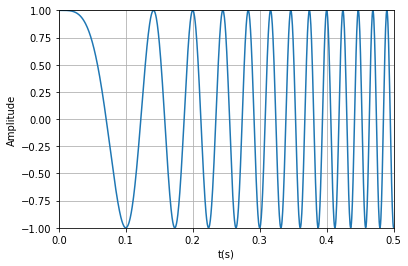

In [10]:
clf()
t = linspace(0,0.5,1000)
x = cos(pi*100*t*t)
plot(t,x)
grid(True)
xlabel('t(s)')
ylabel('Amplitude')
axis([0,0.5,-1,1])

frequência instantânea deste sinal pode ser obtida derivando a fase em relação ao tempo:

\begin{equation}
\large
f(t) = \frac{\partial\phi(t)}{\partial{t}} \\
= \frac{\partial\pi\alpha{t^2}}{\partial{t}} \\
= 2\pi\alpha{t},
\end{equation}

a partir da qual podemos perceber que a frequência instantânea do sinal é $\alpha{t}$ e varia linearmente com o tempo. Para cada item a seguir, utilize a frequência de amostragem de $fs = 8192 Hz$.

**1.** Com $\alpha = 2048$ use o comando subplot para traçar a equação (4) na parte superior de uma figura, ou seja, para traçar a frequência instantânea do sinal em função do tempo. Considere um intervalo de $[0, 2]$ segundos. No subplot inferior, trace o specgram de $x(t)$.

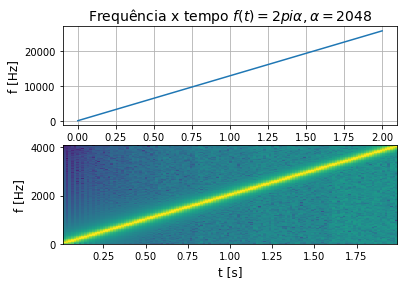

In [12]:
fs = 8192
alfa = 2048
t = linspace(0,2,1000)
f = 2*pi*alfa*t
tmax = round(fs*2)
n = arange(0,tmax+1)
x = cos(pi*alfa*t*t)
n = arange(0,tmax+1)
x1 = cos(pi*alfa*n*n/fs/fs, dtype=float32)   
x1 = float32(x1/amax(x1))

clf()
subplot(2,1,1)

title('Frequência x tempo $f(t) = 2pi'r'\alpha, 'r'\alpha = 2048$'\
,fontsize=14)

grid(True)
ylabel('f [Hz]',fontsize=12)
plot(t,f)
subplot(2,1,2)
xlabel('t [s]',fontsize=12)
ylabel('f [Hz]',fontsize=12)
specgram(x1,256,fs)
    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
# play
stream.write(x1, num_frames=size(x1))
stream.stop_stream()
stream.close()
p.terminate()

Os resultados são consistentes? Amostre o sinal sobre um intervalo de 2 segundos e escute este sinal. A frequência parece estar aumentando linearmente com o tempo?

**Resposta:**

Sim, são consistentes. É possível escutar que a frequência está aumentando linearmente pois o audio fica a cada instante mais agudo. É possível notar também através dos dois plots mostrados acima.

**2.** Refaça a mesma figura anterior usando $\alpha = 8192$, com o mesmo intervalo de $[0, 2]$ segundos.  Amostre o sinal sobre um intervalo de 2 segundos e escute este sinal. 

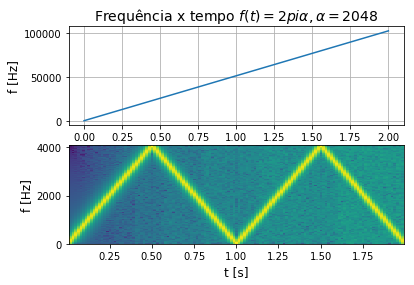

In [18]:
fs = 8192
alfa = 8192
t = linspace(0,2,1000)
f = 2*pi*alfa*t
tmax = round(fs*2)
n = arange(0,tmax+1)
x = cos(pi*alfa*t*t)
n = arange(0,tmax+1)
x1 = cos(pi*alfa*n*n/fs/fs, dtype=float32)   
x1 = float32(x1/amax(x1))

clf()
subplot(2,1,1)

title('Frequência x tempo $f(t) = 2pi'r'\alpha, 'r'\alpha = 2048$'\
,fontsize=14)

grid(True)
ylabel('f [Hz]',fontsize=12)
plot(t,f)
subplot(2,1,2)
xlabel('t [s]',fontsize=12)
ylabel('f [Hz]',fontsize=12)
specgram(x1,256,fs)
    
p = PyAudio()
stream = p.open(format=paFloat32, channels=1, rate=fs, output=True)
# play
stream.write(x1, num_frames=size(x1))
stream.stop_stream()
stream.close()
p.terminate()

Qual a razão da diferença observada? A frequência parece estar aumentando linearmente com o tempo? Caso negativo, use seu esboço da frequência instantânea e a sua relação com a frequência de amostragem para explicar o som obtido.

**Resposta:***

A frequência está variando linearmente com o tempo e não apenas aumentando.

O primeiro subplot leva ao engano, mostrando que a frequência apenas aumenta linearmente ao longo do toda a faixa de 2 segundos.
Entretanto, devido à $\alpha$ ser igual em valor à frequência de amostragem, o sinal completa dois ciclos, conforme mostra o espectrograma.
Fica visível, então, que para o sinal completar um ciclo inteiro em 2 segundos, é necessário que $\alpha$ seja igual a $4096$, e $2048$ para apenas aumentar linearmente numa faixa de tempo de $2 s$.